In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<class 'ModuleNotFoundError'>: No module named 'pandas'

In [37]:
import pandas as pd

df=pd.read_csv('Customer_Segmentation (Dataset).csv')
print(df.head())

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          1.0  Cat_6            B  
1        Average          4.0  Cat_6            A  
2            Low          1.0  Cat_6            A  
3           High          2.0  Cat_6            B  
4            Low          4.0  Cat_6            A  


<class 'OSError'>: Not available

In [38]:
print("Sample data:")
display(df.head())

Sample data:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [39]:
print("Sample data:")
display(df.tail())

Sample data:


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7,A


In [40]:
print("Data Summary:")
df.info()

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 154.0+ KB


In [41]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


In [42]:
df.dropna(inplace=True)

In [43]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2154.000000,2154.000000,2154.000000,2154.000000
mean,463496.744661,43.461467,2.551532,2.837047
std,2591.465156,16.761895,3.344917,1.566872
min,458989.000000,18.000000,0.000000,1.000000
25%,461282.250000,30.000000,0.000000,2.000000
50%,463535.000000,41.000000,1.000000,2.000000
75%,465705.750000,52.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [44]:
print(df.head())

       ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
3  459000    Male          Yes   59        No   Executive             11.0   
5  459003    Male          Yes   47       Yes      Doctor              0.0   
6  459005    Male          Yes   61       Yes      Doctor              5.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          1.0  Cat_6            B  
1        Average          4.0  Cat_6            A  
3           High          2.0  Cat_6            B  
5           High          5.0  Cat_4            C  
6            Low          3.0  Cat_6            D  


In [45]:
features=df.select_dtypes(include=[np.number])

In [46]:
print(features.columns)

Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')


In [47]:
print(features)

          ID  Age  Work_Experience  Family_Size
0     458989   36              0.0          1.0
1     458994   37              8.0          4.0
3     459000   59             11.0          2.0
5     459003   47              0.0          5.0
6     459005   61              5.0          3.0
...      ...  ...              ...          ...
2621  467950   35              1.0          2.0
2622  467954   29              9.0          4.0
2623  467958   35              1.0          1.0
2625  467961   47              1.0          5.0
2626  467968   43              9.0          3.0

[2154 rows x 4 columns]


In [48]:
print(df.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


In [49]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(features)

In [50]:
import pandas as pd
scaled_df=pd.DataFrame(scaled_data,columns=features.columns)
print("Scaled Data(as DataFrame):")
print(scaled_df.head())

Scaled Data(as DataFrame):
         ID       Age  Work_Experience  Family_Size
0 -1.739862 -0.445248        -0.762986    -1.172702
1 -1.737932 -0.385575         1.629258     0.742385
2 -1.735616  0.927231         2.526349    -0.534340
3 -1.734458  0.211155        -0.762986     1.380748
4 -1.733686  1.046577         0.732167     0.104023


In [51]:
inertia=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(scaled_data)
  inertia.append(kmeans.inertia_)

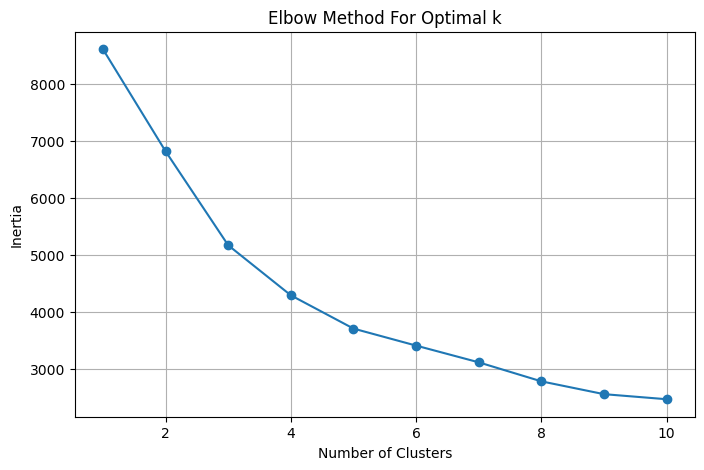

In [52]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),inertia,marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [53]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df['Cluster']=kmeans.fit_predict(scaled_data)

In [54]:
 pca=PCA(n_components=2)
 reduced_data=pca.fit_transform(scaled_data)
df['PCA']=reduced_data[:,0]
df['PCA']=reduced_data[:,1]

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",palette="Set1",data=df)
plt.title("Customer Segments(2D PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

<class 'NameError'>: name 'sns' is not defined

In [ ]:
print("\nCluster-wise summary:")
display(df.groupby("Cluster").mean())